## Project Outline

## Import  Packages

In [59]:
import pandas as pd
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for interactive plots
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual


## Read Data

In [2]:
df=pd.read_csv("books.csv")

## Display  first 5 rows

In [3]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPrÃ©,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPrÃ©,4.49,439358078,9.78044E+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPrÃ©,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPrÃ©,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic


## Check  shape of the Dataset (Rows and Columns)

In [4]:
df.shape

(11127, 12)

## Remove extra space from the column name

In [5]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [6]:
df.columns=df.columns.str.strip()

In [7]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

## Check datatypes of the  columns

In [8]:
df.dtypes

bookID                 int64
title                 object
authors               object
average_rating        object
isbn                  object
isbn13                object
language_code         object
num_pages             object
ratings_count          int64
text_reviews_count     int64
publication_date      object
publisher             object
dtype: object

## Describe the data

In [9]:
df.describe()

,bookID,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,1.793649e+04,541.864474
std,13093.358023,1.124794e+05,2576.174610
min,1.000000,0.000000e+00,0.000000
25%,10287.000000,1.040000e+02,9.000000
50%,20287.000000,7.450000e+02,47.000000
75%,32104.500000,4.993500e+03,237.500000
max,45641.000000,4.597666e+06,94265.000000


In [10]:
df.describe(include='object')

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,publication_date,publisher
count,11127,11127,11127,11127,11127,11127,11127,11127,11127
unique,10352,6643,213,11126,243,31,999,3682,2294
top,The Brothers Karamazov,Stephen King,4,3.58,9.78014E+12,eng,288,10/1/2005,Vintage
freq,9,40,219,2,662,8908,230,56,318


## Clearing and Filtering the data

In [11]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [12]:
df.duplicated().any()

False

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7   num_pages           11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.0+ MB


# Feature Engineering 
#### Extract the size of Features
####  Reducing the size of Features
#### Creating new features from the existing ones

In [14]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [15]:
df.isbn.nunique()

11126

In [16]:
df.isbn13.nunique()

243

In [17]:
df.drop(['bookID','isbn','isbn13'],axis=1,inplace=True)

In [18]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher'],
      dtype='object')

In [19]:
df.publication_date

0         9/16/2006
1          9/1/2004
2         11/1/2003
3          5/1/2004
4         9/13/2004
            ...    
11122    12/21/2004
11123     12/1/1988
11124      8/1/1993
11125     2/27/2007
11126     5/28/2006
Name: publication_date, Length: 11127, dtype: object

In [20]:
df['year']=df['publication_date'].str.split('/')


In [21]:
from datetime import datetime
def extract_year(date_string):
    try:
        return datetime.strptime(date_string, '%m/%d/%Y').year
    except ValueError:
        return None  # Handle invalid dates by returning None or another appropriate value

df['year'] = df['publication_date'].apply(lambda x: extract_year(x))


In [22]:
df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPrÃ©,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006.0
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPrÃ©,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004.0
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,2003.0
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPrÃ©,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004.0
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPrÃ©,4.78,eng,2690,41428,164,9/13/2004,Scholastic,2004.0


In [23]:
df.isnull().sum()

title                 0
authors               0
average_rating        0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
year                  6
dtype: int64

In [24]:
rn = df[df.isnull().any(axis=1)]
print(rn)
df.dropna()

                                                   title  \
3348   Streetcar Suburbs: The Process of Growth in Bo...   
4702                   The Tolkien Fan's Medieval Reader   
5877                      Patriots (The Coming Collapse)   
8180   In Pursuit of the Proper Sinner (Inspector Lyn...   
8979   Brown's Star Atlas: Showing All The Bright Sta...   
11098        Montaillou  village occitan de 1294 Ã  1324   

                                               authors  \
3348                                   Sam Bass Warner   
4702          David E. Smith (Turgon of TheOneRing.net   
5877                                      James Wesley   
8180                                 Elizabeth  George   
8979                                             Brown   
11098  Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie   

                                          average_rating language_code  \
3348                                   Jr./Sam B. Warner   9.78067E+12   
4702    one of the found

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPrÃ©,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006.0
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPrÃ©,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004.0
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,2003.0
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPrÃ©,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004.0
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPrÃ©,4.78,eng,2690,41428,164,9/13/2004,Scholastic,2004.0
...,...,...,...,...,...,...,...,...,...,...
11122,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,12/21/2004,Da Capo Press,2004.0
11123,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,12/1/1988,Penguin Books,1988.0
11124,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,8/1/1993,Penguin Books,1993.0
11125,Poor People,William T. Vollmann,3.72,eng,434,769,139,2/27/2007,Ecco,2007.0


In [25]:
dd=df.dropna(inplace=True)
print(dd)

None


In [26]:
df['year']=df['year'].astype('int')

In [27]:
df['year'].min()

1900

In [28]:
df['year'].max()

2020

In [29]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

# Exploratory Data Analysis

In [30]:
df[df['year']==2020][['title','authors','average_rating','language_code','publisher']]

,title,authors,average_rating,language_code,publisher
9668,A Quick Bite (Argeneau #1),Lynsay Sands,3.91,eng,Avon


In [31]:
df.groupby(['year'])['title'].agg('count').sort_values(ascending=False).head(20)

year
2006    1700
2005    1260
2004    1069
2003     931
2002     798
2001     656
2000     533
2007     518
1999     450
1998     396
1997     290
1996     250
1995     249
1994     220
1992     183
1993     165
1991     151
1989     118
1990     117
1987      88
Name: title, dtype: int64

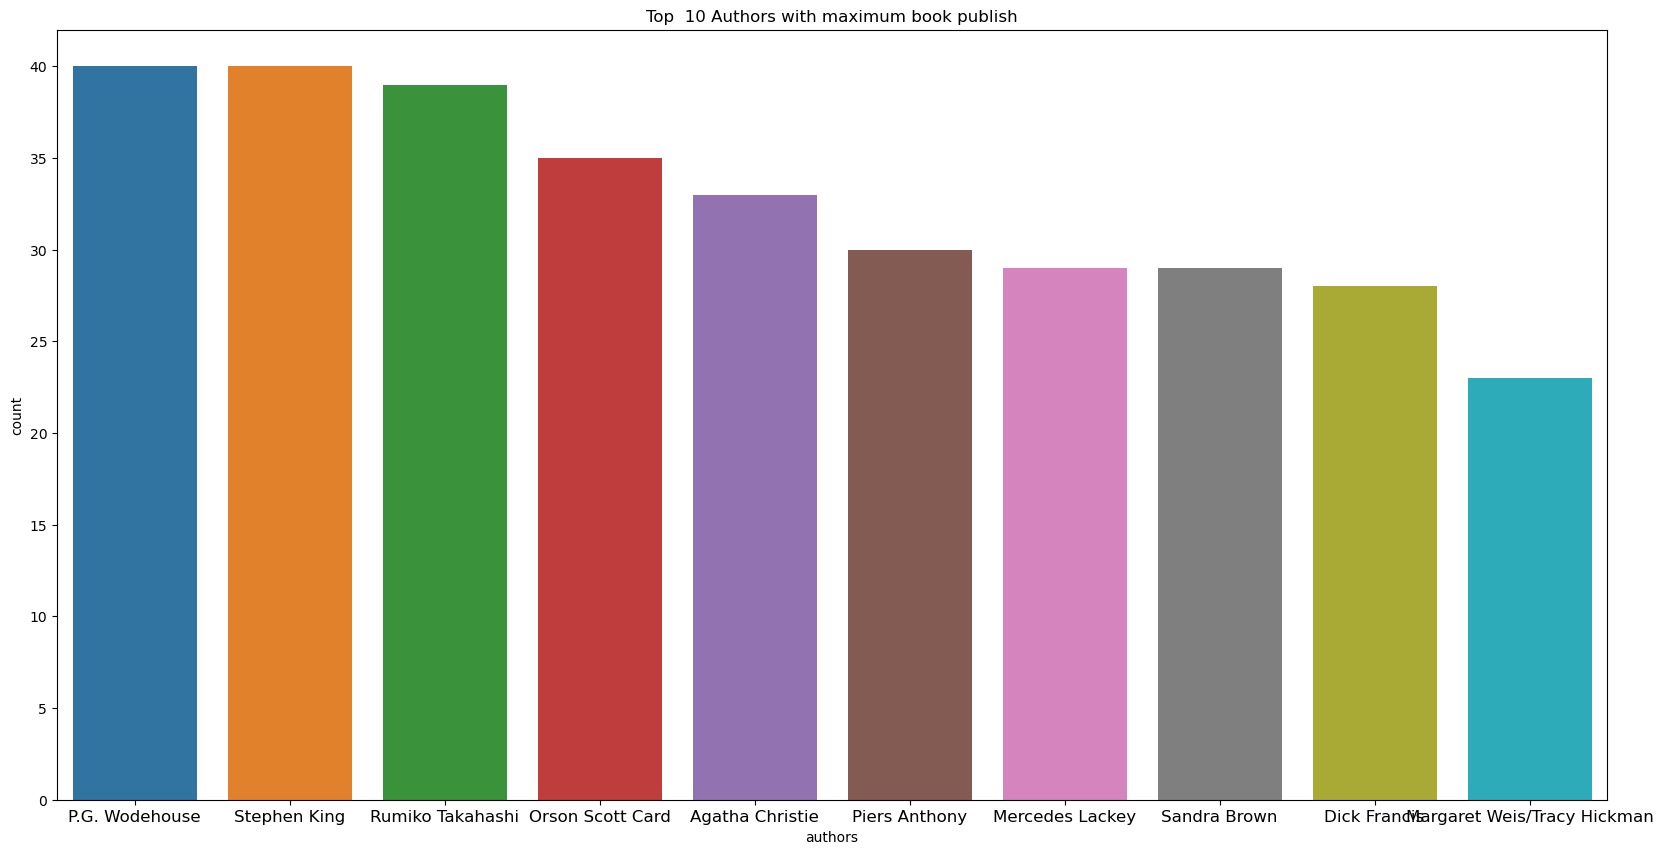

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(x='authors',data=df,order=df['authors'].value_counts().iloc[:10].index)
plt.title("Top  10 Authors with maximum book publish")
plt.xticks(fontsize=12)
plt.show()

In [33]:
df.language_code.value_counts()

language_code
eng      8907
en-US    1408
spa       218
en-GB     214
fre       143
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: count, dtype: int64

In [34]:
numeric_columns = ['average_rating', 'ratings_count', 'text_reviews_count']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace('[^\d.]', ''), errors='coerce')


In [35]:
df.groupby(['language_code'])[['average_rating','ratings_count',
                               'text_reviews_count'
                              ]].agg('mean').style.background_gradient(cmap='Wistia')


,average_rating,ratings_count,text_reviews_count
language_code,,,
ale,4.360000,102.000000,16.000000
ara,3.550000,122.000000,12.000000
en-CA,4.025714,4086.714286,324.428571
en-GB,3.923411,2463.691589,104.060748
en-US,3.914659,3773.906960,160.357244
eng,3.934043,21571.503312,645.195913
enm,3.873333,3233.666667,84.000000
fre,3.971608,3300.132867,64.951049
ger,3.950101,234.727273,8.232323


In [36]:
book=df['title'].value_counts()[:20]
print(book)

title
The Brothers Karamazov        9
The Iliad                     9
Anna Karenina                 8
Gulliver's Travels            8
'Salem's Lot                  8
The Odyssey                   8
The Picture of Dorian Gray    7
A Midsummer Night's Dream     7
Treasure Island               6
Sense and Sensibility         6
Jane Eyre                     6
The Great Gatsby              6
The Histories                 6
The Scarlet Letter            6
The Secret Garden             6
Romeo and Juliet              6
Robinson Crusoe               6
Macbeth                       6
Collected Stories             6
Pride and Prejudice           5
Name: count, dtype: int64


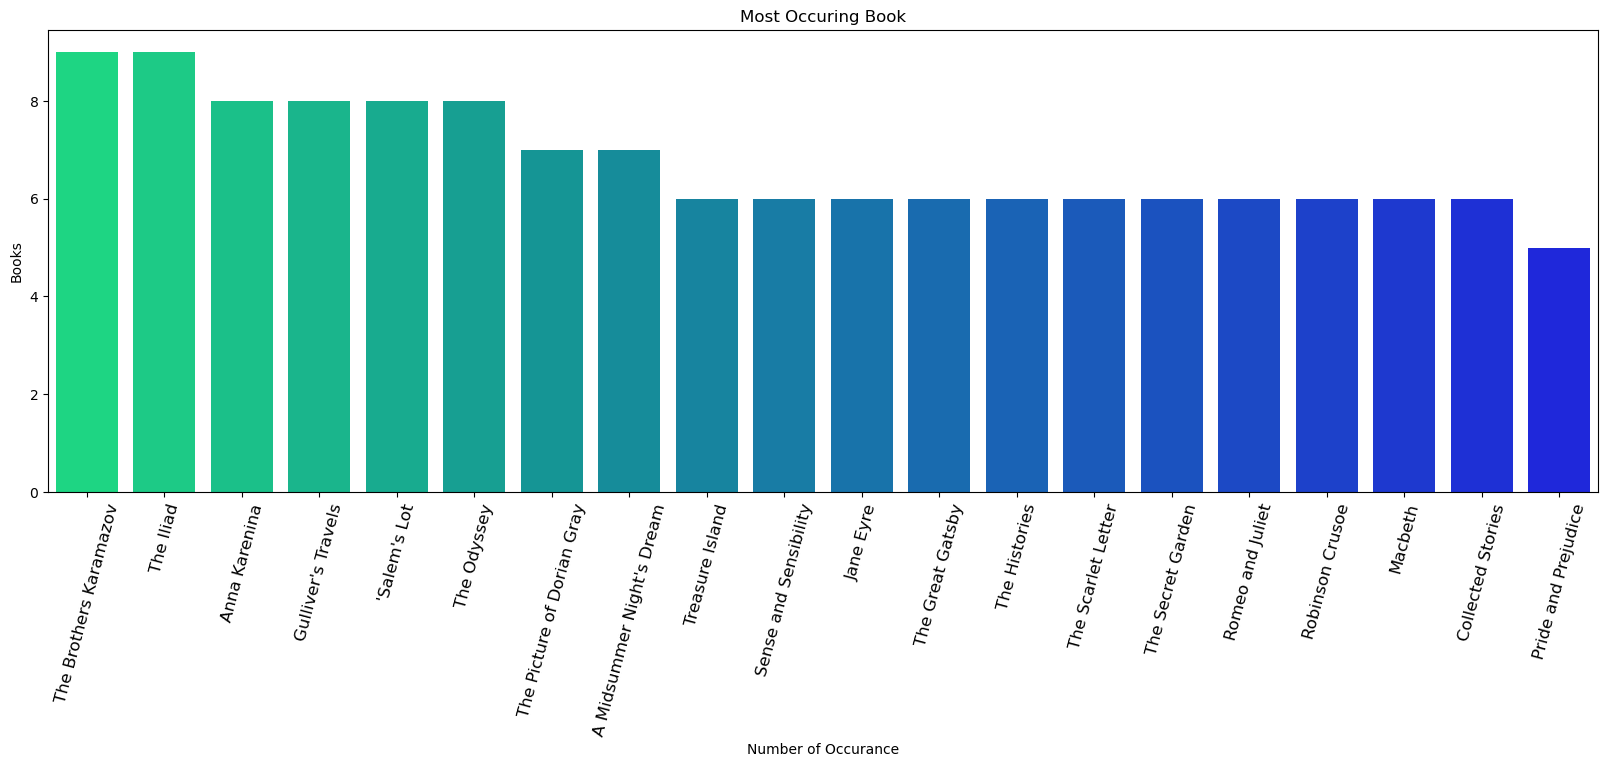

In [37]:
#to find most occuring book in our data
plt.figure(figsize=(20,6))
book=df['title'].value_counts()[:20]
sns.barplot(x=book.index, y=book,palette='winter_r')
plt.title("Most Occuring Book")
plt.xlabel("Number of Occurance")
plt.ylabel("Books")
plt.xticks(rotation=75,fontsize='12')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_10256\3493288629.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_rating'])


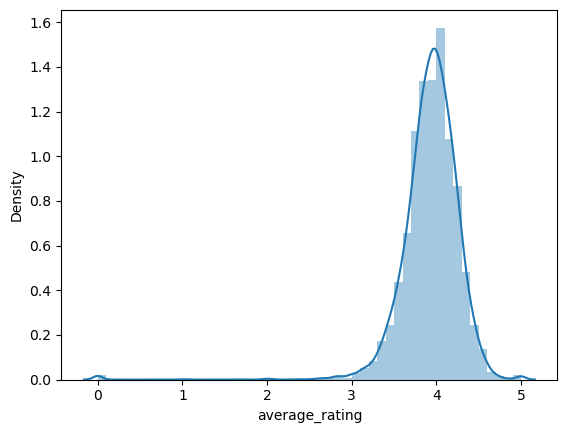

In [38]:
sns.distplot(df['average_rating'])
plt.show()

In [39]:
df[df['average_rating']==df.average_rating.max()][['title','authors','language_code','publisher','average_rating']]

,title,authors,language_code,publisher,average_rating
624,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,grc,Oxford University Press USA,5.0
786,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,eng,Schirmer Mosel,5.0
855,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,eng,Teaching Resources,5.0
1243,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,eng,Arcadia Publishing,5.0
4126,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,eng,BradyGames,5.0
4790,The Diamond Color Meditation: Color Pathway to...,John Diamond,eng,Square One Publishers,5.0
4935,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,eng,Vantage Press,5.0
5025,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,eng,Boosey & Hawkes Inc,5.0
5476,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,eng,BBC Physical Audio,5.0
5478,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,eng,BBC Physical Audio,5.0


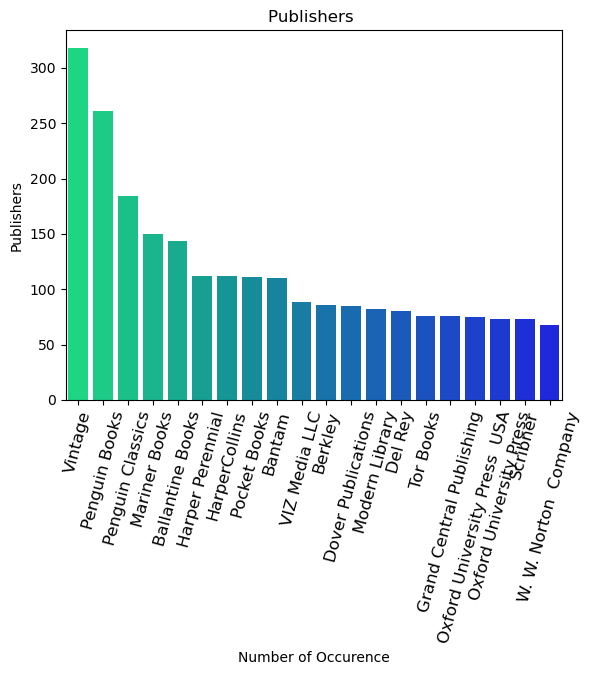

In [40]:
publisher=df['publisher'].value_counts()[:20]
sns.barplot(x=publisher.index,y=publisher, palette='winter_r')
plt.title("Publishers ")
plt.xlabel("Number of Occurence")
plt.ylabel("Publishers")
plt.xticks(rotation=75,fontsize=12)
plt.show()

## Recommending Books based on publishers

In [41]:
def rec_book(x):
    a=df[df['publisher']==x][['title','average_rating','authors']]
    a=a.sort_values(by='average_rating',ascending=False)
    return a.head(10)

In [42]:
rec_book('Del Rey')

,title,average_rating,authors
9091,The Making of Star Wars (Star Wars: The Makin...,4.53,J.W. Rinzler/Peter Jackson
5230,The Belgariad Vol. Two: Castle of Wizardry / ...,4.39,David Eddings
5233,The Malloreon Vol. 2: Sorceress of Darshiva /...,4.36,David Eddings
5232,The Malloreon Vol. 1: Guardians of the West /...,4.34,David Eddings
8687,The Conquering Sword of Conan (Conan the Cimme...,4.33,Robert E. Howard/Gregory Manchess/Patrice Louinet
3765,Tsubasa: RESERVoir CHRoNiCLE Vol. 12,4.31,CLAMP/William Flanagan
11027,Judas Unchained (Commonwealth Saga #2),4.31,Peter F. Hamilton
9260,The Transition of H. P. Lovecraft: The Road to...,4.30,H.P. Lovecraft/Barbara Hambly
9085,Star Wars: The New Essential Chronology,4.30,Daniel Wallace/Mark Chiarello/Tommy Lee Edwar...
3762,Tsubasa: RESERVoir CHRoNiCLE Vol. 6,4.30,CLAMP/William Flanagan


In [43]:
@interact
def rec_books_publisher(publisher=list(df['publisher'].value_counts().index)):
    a=df[df['publisher']==publisher][['title','average_rating','authors']]
    a=a.sort_values(by='average_rating',ascending=False)
    return a.head(10)

interactive(children=(Dropdown(description='publisher', options=('Vintage', 'Penguin Books', 'Penguin Classics…

## Recommending Books based on Authors

In [44]:
@interact
def rec_book_aut(author=list(df['authors'].value_counts().index)):
    a=df[df['authors']==author][['title','average_rating','publisher']]
    a=a.sort_values(by='average_rating',ascending=False)
    return a.head(10)

interactive(children=(Dropdown(description='author', options=('P.G. Wodehouse', 'Stephen King', 'Rumiko Takaha…

## Recommending Books based on Language

In [45]:
@interact
def book_rec_eng(language=list(df['language_code'].value_counts().index)):
    a=df[df['language_code']==language][['title','average_rating','publisher']]
    a=a.sort_values(by='average_rating',ascending=False)
    return a.head(10)

interactive(children=(Dropdown(description='language', options=('eng', 'en-US', 'spa', 'en-GB', 'fre', 'ger', …

# Data Preprocessing

In [46]:
df.head(1)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPrÃ©,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006


In [47]:
def num_to_obj(x):
    if x>0 and x<=1:
        return "between 0 and 1"
    if x>1 and x<=2:
        return "between 1 and 2"
    if x>2 and x<=3:
        return "between 2 and 3"
    if x>3 and x<=4:
        return "between 3 and 4"
    if x>4 and x<=5:
        return "between 4 and 5"
df['rating_obj']=df['average_rating'].apply(num_to_obj)

In [48]:
df['rating_obj'].value_counts()

rating_obj
between 3 and 4    6284
between 4 and 5    4734
between 2 and 3      69
between 1 and 2       7
between 0 and 1       2
Name: count, dtype: int64

In [49]:
rating_df=pd.get_dummies(df['rating_obj'])
rating_df.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,False,True


In [50]:
language_df=pd.get_dummies(df['language_code'])
language_df.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
features=pd.concat([rating_df,language_df,df['average_rating'],df['ratings_count'],df['title']],axis=1)
features.set_index('title',inplace=True)
features.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
title,,,,,,,,,,,,,,,,,,,,,
Harry Potter and the Half-Blood Prince (Harry Potter #6),False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.57,2095690
Harry Potter and the Order of the Phoenix (Harry Potter #5),False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.49,2153167
Harry Potter and the Chamber of Secrets (Harry Potter #2),False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.42,6333
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.56,2339585
Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.78,41428


In [52]:
from sklearn.preprocessing import MinMaxScaler


In [53]:
scaler=MinMaxScaler()
features_scaled=scaler.fit_transform(features)

In [54]:
features_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.14000000e-01, 4.55816060e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.98000000e-01, 4.68317403e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.84000000e-01, 1.37743803e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.92000000e-01, 1.78351363e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.44000000e-01, 1.67258779e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.82000000e-01, 2.45776879e-05]])

# Model Building

In [55]:
from sklearn import neighbors

In [56]:
model=neighbors.NearestNeighbors(n_neighbors=5,algorithm='ball_tree',metric='euclidean')
model.fit(features_scaled)
dist,idlist=model.kneighbors(features_scaled)

In [57]:
df['title'].value_counts()

title
The Brothers Karamazov                         9
The Iliad                                      9
Anna Karenina                                  8
Gulliver's Travels                             8
'Salem's Lot                                   8
                                              ..
Wildwood Dancing (Wildwood  #1)                1
The Noonday Demon: An Atlas of Depression      1
The Noonday Demon: An Anatomy of Depression    1
My Secret: A PostSecret Book                   1
Las aventuras de Tom Sawyer                    1
Name: count, Length: 10346, dtype: int64

## Now this is the final model which we use as "Book Recommendation System"

In [58]:
@interact
def BookRecomender(book_name=list(df['title'].value_counts().index)):
    book_list_name=[]
    book_id=df[df['title']==book_name].index
    book_id=book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df.iloc[newid].title)
    return book_list_name

interactive(children=(Dropdown(description='book_name', options=('The Brothers Karamazov', 'The Iliad', 'Anna …